Importing basic Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import collections
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

import wordcloud
from wordcloud import WordCloud, STOPWORDS 

Considering the Cleaned Data So no pre processing wilbe required

In [2]:
data_text = pd.read_csv("Cleaned_Text.csv")

In [3]:
data_text.head(5)

,Unnamed: 0,VAX_MANU,text,text_length
0,2,PFIZER\BIONTECH,discomfort dysphagia visual impairment,4
1,4,MODERNA,erythema pruritus warmth,3
2,6,MODERNA,abdominal sleep disorder,3
3,7,MODERNA,diarrhoea nasal congestion,3
4,8,MODERNA,vaccination erythema vaccination pruritus vacc...,5


In [4]:
import nltk
#nltk.download('book')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [5]:
data_text["text"] = data_text['text'].str.replace(r'\b\w{15,3000}\b', r' ')

In [6]:
data_text["text"] = data_text['text'].str.replace('deliver', '')
data_text["text"] = data_text['text'].str.replace('count', '')
data_text["text"] = data_text['text'].str.replace('rate', '')
data_text["text"] = data_text['text'].str.replace('skin', '')
data_text["text"] = data_text['text'].str.replace('blood', '')
data_text["text"] = data_text['text'].str.replace('decrease', '')
data_text["text"] = data_text['text'].str.replace('computerised', '')
data_text["text"] = data_text['text'].str.replace('head', '')
data_text["text"] = data_text['text'].str.replace('image', '')

In [7]:
from collections import Counter
cnt = Counter()
for text in data_text['text'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(20)

[('discomfort', 19238),
 ('disorder', 15540),
 ('dyspnoea', 15422),
 ('pruritus', 15036),
 ('erythema', 14735),
 ('tomogram', 12644),
 ('hypoaesthesia', 11579),
 ('paraesthesia', 11553),
 ('vaccination', 10833),
 ('asthenia', 10093),
 ('abdominal', 9988),
 ('heart', 9093),
 ('negative', 8617),
 ('hyperhidrosis', 8096),
 ('xray', 7797),
 ('peripheral', 7631),
 ('magnetic', 7596),
 ('resonance', 7595),
 ('oral', 7530),
 ('reaction', 7527)]

In [8]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

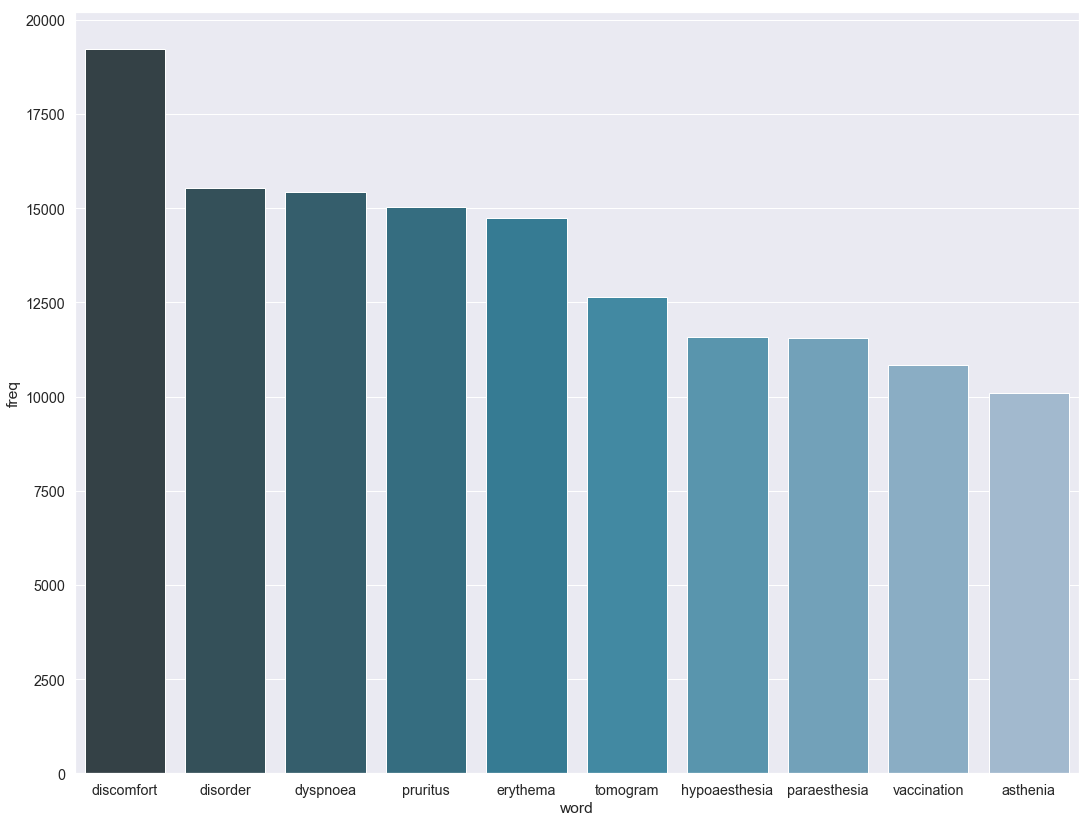

In [ ]:
sr_clean= data_text['text']
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 14))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [ ]:
# Word Cloud - Overall

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

stopwords = lemmatize_words_1(data_text['text'])

comment_words = ' '

for val in data_text['text']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', max_words=100, 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Red') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

In [ ]:
## Filtering out the PFIZER\\BIONTECH

data_text_1 = data_text[data_text['VAX_MANU'] == 'PFIZER\\BIONTECH']

# Word Cloud

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

stopwords = lemmatize_words_1(data_text_1['text'])

comment_words = ' '

for val in data_text_1['text']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, max_words=100,
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Red') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

In [ ]:
sr_clean= data_text_1['text']
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 14))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [ ]:
## Filtering out the MODERNA

data_text_2 = data_text[data_text['VAX_MANU'] == 'MODERNA']

# Word Cloud

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

stopwords = lemmatize_words_1(data_text_2['text'])

comment_words = ' '

for val in data_text_2['text']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', max_words=100,
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Red') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

In [ ]:
sr_clean= data_text_2['text']
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 14))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [ ]:
## Filtering out the JANSSEN

data_text_3 = data_text[data_text['VAX_MANU'] == 'JANSSEN']

# Word Cloud

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

stopwords = lemmatize_words_1(data_text_3['text'])

comment_words = ' '

for val in data_text_3['text']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', max_words=100,
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Red') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

In [ ]:
sr_clean= data_text_3['text']
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(10), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 14))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

*** Networrk Graph

In [ ]:
from nltk import bigrams
# Create list of lists containing bigrams in text
key_words = [text.lower().split() for text in data_text.text]
terms_bigram = [list(bigrams(text)) for text in key_words]
terms_bigram[0]

Network Graph using Top 30 Words

In [ ]:
## Overall

import itertools
bigrams = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigrams)

bigram_df = pd.DataFrame(bigram_counts.most_common(30),
                             columns=['bigram', 'count'])

import networkx as nx
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(24, 16))

pos = nx.spring_layout(G, k=1)

nx.draw_networkx(G, pos,
                 font_size=15,
                 width=6,
                 edge_color='blue',
                 node_color='black',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='white', alpha=0.25),
            horizontalalignment='right', 
            verticalalignment = 'center',
            fontsize=12)
    
plt.show()

**************************  End ****************************